In [50]:
#GroupBy on DataFrames
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

In [51]:
dframe = DataFrame({'A1':['X', 'X', 'Y', 'Y', 'Z'],
                    'A2':['Alpha', 'Alpha', 'Beta', 'Beta', 'Alpha'],
                    'DataSet1': np.random.randn(5),
                    'DataSet2': np.random.randn(5)})
dframe

,A1,A2,DataSet1,DataSet2
0,X,Alpha,0.805044,1.575027
1,X,Alpha,-1.509752,1.426175
2,Y,Beta,-1.305029,1.256834
3,Y,Beta,1.127163,-0.616765
4,Z,Alpha,0.211452,-0.350576


In [52]:
group1 = dframe['DataSet1'].groupby(dframe['A1'])
group1

In [53]:
group1.mean()                                            #Mean for 'DataSet1' & 'A1' only

A1
X   -0.352354
Y   -0.088933
Z    0.211452
Name: DataSet1, dtype: float64

In [54]:
group2 = dframe['DataSet2'].groupby(dframe['A1'])
group2

In [55]:
group2.mean()

A1
X    1.500601
Y    0.320035
Z   -0.350576
Name: DataSet2, dtype: float64

In [56]:
cities = np.array(['LA', 'SF', 'CHI', 'BER', 'LDN'])
month = np.array(['June', 'July', 'May', 'August', 'May'])

In [57]:
dframe['DataSet1'].groupby([cities, month]).mean()

BER  August    1.127163
CHI  May      -1.305029
LA   June      0.805044
LDN  May       0.211452
SF   July     -1.509752
Name: DataSet1, dtype: float64

In [58]:
dframe

,A1,A2,DataSet1,DataSet2
0,X,Alpha,0.805044,1.575027
1,X,Alpha,-1.509752,1.426175
2,Y,Beta,-1.305029,1.256834
3,Y,Beta,1.127163,-0.616765
4,Z,Alpha,0.211452,-0.350576


In [59]:
dframe.groupby('A1').mean()

,DataSet1,DataSet2
A1,,
X,-0.352354,1.500601
Y,-0.088933,0.320035
Z,0.211452,-0.350576


In [60]:
dframe.groupby(['A1', 'A2']).mean()

,,DataSet1,DataSet2
A1,A2,,
X,Alpha,-0.352354,1.500601
Y,Beta,-0.088933,0.320035
Z,Alpha,0.211452,-0.350576


In [61]:
dframe.groupby(['A1']).size()

A1
X    2
Y    2
Z    1
dtype: int64

In [62]:
dframe.groupby(['A2']).size()

A2
Alpha    3
Beta     2
dtype: int64

In [63]:
dframe

,A1,A2,DataSet1,DataSet2
0,X,Alpha,0.805044,1.575027
1,X,Alpha,-1.509752,1.426175
2,Y,Beta,-1.305029,1.256834
3,Y,Beta,1.127163,-0.616765
4,Z,Alpha,0.211452,-0.350576


In [64]:
for name,group in dframe.groupby('A1'):
    print('This is the %s group' %name)                           #'%s' indicates indices to be filled from DataFrame above
    print(group)
    print('\n')

This is the X group
  A1     A2  DataSet1  DataSet2
0  X  Alpha  0.805044  1.575027
1  X  Alpha -1.509752  1.426175


This is the Y group
  A1    A2  DataSet1  DataSet2
2  Y  Beta -1.305029  1.256834
3  Y  Beta  1.127163 -0.616765


This is the Z group
  A1     A2  DataSet1  DataSet2
4  Z  Alpha  0.211452 -0.350576




In [65]:
for (A1, A2), group in dframe.groupby(['A1', 'A2']):
    print('Key 1 = %s | Key 2 -> %s' %(A1, A2))
    print(group)
    print('\n')

Key 1 = X | Key 2 -> Alpha
  A1     A2  DataSet1  DataSet2
0  X  Alpha  0.805044  1.575027
1  X  Alpha -1.509752  1.426175


Key 1 = Y | Key 2 -> Beta
  A1    A2  DataSet1  DataSet2
2  Y  Beta -1.305029  1.256834
3  Y  Beta  1.127163 -0.616765


Key 1 = Z | Key 2 -> Alpha
  A1     A2  DataSet1  DataSet2
4  Z  Alpha  0.211452 -0.350576




In [66]:
group100 = dict(list(dframe.groupby('A1')))
group100['X']

,A1,A2,DataSet1,DataSet2
0,X,Alpha,0.805044,1.575027
1,X,Alpha,-1.509752,1.426175


In [67]:
group200 = dict(list(dframe.groupby('A1')))
group200['Y']

,A1,A2,DataSet1,DataSet2
2,Y,Beta,-1.305029,1.256834
3,Y,Beta,1.127163,-0.616765


In [68]:
group300 = dict(list(dframe.groupby('A1')))
group300['Z']

,A1,A2,DataSet1,DataSet2
4,Z,Alpha,0.211452,-0.350576


In [69]:
group400 = dict(list(dframe.groupby(dframe.dtypes, axis = 1)))       #Seperated data by type of data -> Along the axis
group400

{dtype('float64'):    DataSet1  DataSet2
 0  0.805044  1.575027
 1 -1.509752  1.426175
 2 -1.305029  1.256834
 3  1.127163 -0.616765
 4  0.211452 -0.350576, dtype('O'):   A1     A2
 0  X  Alpha
 1  X  Alpha
 2  Y   Beta
 3  Y   Beta
 4  Z  Alpha}

In [70]:
dataset_group = dframe.groupby(['A1', 'A2'])[['DataSet2']]
dataset_group.mean()

,,DataSet2
A1,A2,
X,Alpha,1.500601
Y,Beta,0.320035
Z,Alpha,-0.350576


In [71]:
#GroupBy on dict & series
example = DataFrame(np.arange(16).reshape(4,4),
                   columns = ['X', 'Y', 'Z', 'W'],
                   index = ['Airplane', 'Car', 'Bicycle', 'Tram'])
example

,X,Y,Z,W
Airplane,0,1,2,3
Car,4,5,6,7
Bicycle,8,9,10,11
Tram,12,13,14,15


In [72]:
example.loc[1:3, ['Z', 'W']] = np.nan      #'1:3' indicates  2nd & 3rd columns (index = 1 & 2) only to be filled with null values

In [73]:
example

,X,Y,Z,W
Airplane,0,1,2.0,3.0
Car,4,5,NaN,NaN
Bicycle,8,9,NaN,NaN
Tram,12,13,14.0,15.0


In [74]:
map =  {'W': 'Good', 'Y': 'Bad', 'Z': 'Bad', 'X': 'Good'}

In [75]:
example2 = example.groupby(map, axis = 1)                                                #'axis = 1' calls indices
example2.sum()

,Bad,Good
Airplane,3.0,3.0
Car,5.0,4.0
Bicycle,9.0,8.0
Tram,27.0,27.0


In [76]:
map2 = Series(map)                                        #Creaating a series out of a dictionary ('map')
map2

W    Good
Y     Bad
Z     Bad
X    Good
dtype: object

In [77]:
example.groupby(map2, axis = 1).count()                            #Indicates how many readings of each value there are

,Bad,Good
Airplane,2,2
Car,1,1
Bicycle,1,1
Tram,2,2


In [78]:
example

,X,Y,Z,W
Airplane,0,1,2.0,3.0
Car,4,5,NaN,NaN
Bicycle,8,9,NaN,NaN
Tram,12,13,14.0,15.0


In [79]:
example.groupby(len).sum()                                          #Sums up index based on number of letters in each string

,X,Y,Z,W
3,4,5,0.0,0.0
4,12,13,14.0,15.0
7,8,9,0.0,0.0
8,0,1,2.0,3.0


In [80]:
keys = ['A', 'B', 'A', 'B']

In [81]:
example.groupby([len, keys]).max()

,,X,Y,Z,W
3,B,4,5,NaN,NaN
4,B,12,13,14.0,15.0
7,A,8,9,NaN,NaN
8,A,0,1,2.0,3.0


In [82]:
test = pd.MultiIndex.from_arrays([['NY', 'LA', 'MTL', 'NY', 'MTL', 'LA', 'SF', 'MTL'], [1, 2, 3, 1, 2, 3, 1, 2]], 
                                 names = ['City', 'Value'])                              

In [83]:
dframe2 = DataFrame(np.arange(64).reshape(8,8), columns = test)
dframe2 = dframe2 * 10

In [84]:
dframe2

City,NY,LA,MTL,NY,MTL,LA,SF,MTL
Value,1,2,3,1,2,3,1,2
0,0,10,20,30,40,50,60,70
1,80,90,100,110,120,130,140,150
2,160,170,180,190,200,210,220,230
3,240,250,260,270,280,290,300,310
4,320,330,340,350,360,370,380,390
5,400,410,420,430,440,450,460,470
6,480,490,500,510,520,530,540,550
7,560,570,580,590,600,610,620,630


In [85]:
#Aggregation                                                        #Allow scalar result -> Mean etc.
import webbrowser                                                    
websites = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'
webbrowser.open(websites)

True

In [86]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'

In [87]:
dfwine = pd.read_csv('winequality-red.csv', sep = ';')

In [88]:
dfwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [89]:
dfwine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [90]:
dfwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [91]:
dfwine['alcohol'].mean()                                          #Example of data aggregation

10.422983114446502

In [92]:
def max_min(arr):
    return arr.max() - arr.min()

In [93]:
dfw = dfwine.groupby('quality')
dfw

In [94]:
dfw.describe()

alcohol                                                          \
          count       mean       std  min     25%     50%     75%   max   
quality                                                                   
3          10.0   9.955000  0.818009  8.4   9.725   9.925  10.575  11.0   
4          53.0  10.265094  0.934776  9.0   9.600  10.000  11.000  13.1   
5         681.0   9.899706  0.736521  8.5   9.400   9.700  10.200  14.9   
6         638.0  10.629519  1.049639  8.4   9.800  10.500  11.300  14.0   
7         199.0  11.465913  0.961933  9.2  10.800  11.500  12.100  14.0   
8          18.0  12.094444  1.224011  9.8  11.325  12.150  12.875  14.0   

        chlorides            ...   total sulfur dioxide         \
            count      mean  ...                    75%    max   
quality                      ...                                 
3            10.0  0.122500  ...                   42.5   49.0   
4            53.0  0.090679  ...                   49.0  119.0   
5           681.0  0.092736  ...                   84.0  155.0   
6           638.0  0.084956  ...                   54.0  165.0   
7           199.0  0.076588  ...                   43.0  289.0   
8            18.0  0.068444  ...                   43.0   88.0   

        volatile acidity                                                   \
                   count      mean       std   min     25%    50%     75%   
quality                                                                     
3                   10.0  0.884500  0.331256  0.44  0.6475  0.845  1.0100   
4                   53.0  0.693962  0.220110  0.23  0.5300  0.670  0.8700   
5                  681.0  0.577041  0.164801  0.18  0.4600  0.580  0.6700   
6                  638.0  0.497484  0.160962  0.16  0.3800  0.490  0.6000   
7                  199.0  0.403920  0.145224  0.12  0.3000  0.370  0.4850   
8                   18.0  0.423333  0.144914  0.26  0.3350  0.370  0.4725   

                
           max  
quality         
3        1.580  
4        1.130  
5        1.330  
6        1.040  
7        0.915  
8        0.850  

[6 rows x 88 columns]

In [95]:
dfw.agg(max_min)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,4.9,1.140,0.66,4.5,0.206,31.0,40.0,0.00609,0.47,0.46,2.6
4,7.9,0.900,1.00,11.6,0.565,38.0,112.0,0.00760,1.16,1.67,4.1
5,10.9,1.150,0.79,14.3,0.572,65.0,149.0,0.01059,0.86,1.61,6.4
6,9.6,0.880,0.78,14.5,0.381,71.0,159.0,0.01362,1.15,1.55,5.6
7,10.7,0.795,0.76,7.7,0.346,51.0,282.0,0.01256,0.86,0.97,4.8
8,7.6,0.590,0.69,5.0,0.042,39.0,76.0,0.00800,0.84,0.47,4.2


In [96]:
x = dfw.agg('mean')
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [97]:
dfwine['Quality/Alcohol Ratio'] = dfwine['quality'] / dfwine['alcohol']
dfwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Quality/Alcohol Ratio
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.531915
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0.510204
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0.510204
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0.612245
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.531915
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0.531915
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5,0.531915
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7,0.700000
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7,0.736842
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,0.476190


In [98]:
dfwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Quality/Alcohol Ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.510204
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.510204
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.612245
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915


In [99]:
dfwine.pivot_table(index = ['quality'])

,Quality/Alcohol Ratio,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,,
3,0.303286,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,2.635000,0.570000,24.900000,0.884500
4,0.392724,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,2.694340,0.596415,36.245283,0.693962
5,0.507573,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,2.528855,0.620969,56.513950,0.577041
6,0.569801,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,2.477194,0.675329,40.869906,0.497484
7,0.614855,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,2.720603,0.741256,35.020101,0.403920
8,0.668146,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,2.577778,0.767778,33.444444,0.423333


In [100]:
%matplotlib inline
from matplotlib import pyplot as plt

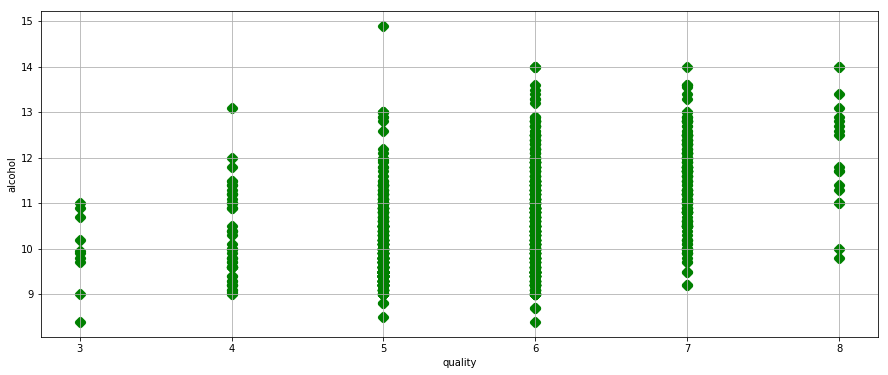

In [101]:
dfwine.plot(kind = 'scatter', x = 'quality', y = 'alcohol', marker = 'D', linewidth = 5, color = 'g', figsize = (15, 6))
plt.grid(True)
plt.show()                                               #A boxplot would be a more suitable graphical representatio of the data

In [102]:
#Split, Apply and Combine
dfwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Quality/Alcohol Ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.510204
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.510204
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.612245
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915


In [103]:
def ranking(dfwine):
    dfwine['Alcohol_Content_Rank'] = np.arange(len(dfwine)) + 1
    return dfwine

In [104]:
dfwine.sort_values('alcohol', ascending = False, inplace = True)

In [105]:
dfwine = dfwine.groupby('quality').apply(ranking)                                     #No.1 alcohol content for quality of 5 etc.
dfwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Quality/Alcohol Ratio,Alcohol_Content_Rank
652,15.9,0.360,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.900000,5,0.335570,1
588,5.0,0.420,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.000000,8,0.571429,1
142,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6,0.428571,1
144,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6,0.428571,2
1270,5.0,0.380,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.000000,6,0.428571,3
1269,5.5,0.490,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.000000,8,0.571429,2
467,8.8,0.460,0.45,2.6,0.065,7.0,18.0,0.99470,3.32,0.79,14.000000,6,0.428571,4
821,4.9,0.420,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.000000,7,0.500000,1
1114,5.0,0.400,0.50,4.3,0.046,29.0,80.0,0.99020,3.49,0.66,13.600000,6,0.441176,5
1228,5.1,0.420,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.600000,7,0.514706,2


In [106]:
ex = dfwine['quality'].value_counts()                                                           #No. of wines at each quality 
ex

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [107]:
dfwine[dfwine.Alcohol_Content_Rank == 1].head(len(ex))                      #Prints highest alcohol content at each quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Quality/Alcohol Ratio,Alcohol_Content_Rank
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,0.335570,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,0.571429,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0.428571,1
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7,0.500000,1
45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,0.305344,1
899,8.3,1.02,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,0.272727,1


In [108]:
#Cross Tabulation
from io import StringIO

In [109]:
#StringIO documentation
import webbrowser
website1 = 'https://docs.python.org/2/library/stringio.html'
webbrowser.open(website1)

True

In [151]:
data = """\
Sample Animal Intelligence Age
1 Dog Smart 20
2 Dog Smart 18
3 Cat Dumb 16
4 Cat Dumb 16
5 Dog Dumb 20
6 Cat Smart 12"""

In [152]:
df12 = pd.read_table(StringIO(data), sep = '\s+')
df12

,Sample,Animal,Intelligence,Age
0,1,Dog,Smart,20
1,2,Dog,Smart,18
2,3,Cat,Dumb,16
3,4,Cat,Dumb,16
4,5,Dog,Dumb,20
5,6,Cat,Smart,12


In [156]:
pd.crosstab(df12.Animal, df12.Age, margins = True)                                         #Counts frequency 

Age,12,16,18,20,All
Animal,,,,,
Cat,1,2,0,0,3
Dog,0,0,1,2,3
All,1,2,1,2,6


In [157]:
pd.crosstab(df12.Animal, df12.Intelligence, margins = True) 

Intelligence,Dumb,Smart,All
Animal,,,
Cat,2,1,3
Dog,1,2,3
All,3,3,6
